In [1]:
# =========================
#
# Titel : HPC Game Of Life
# Author: Dimitri Dening
# Date  : 29.06.2021
#
# =========================

from IPython.display import display
import matplotlib.pyplot as plt
import contextlib
import pandas as pd
import numpy as np
import json
import csv
import os

In [4]:
%matplotlib inline

### Seriell (Referenz vs. Optimiert)

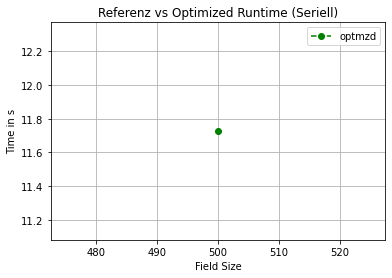

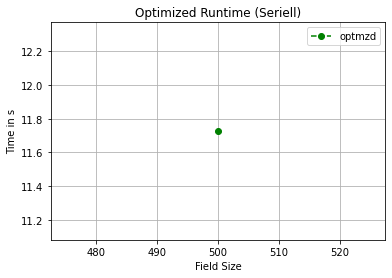

In [6]:
data_dir = '../rawdata/test_srl'
data_sets = [folder.path for folder in os.scandir(data_dir) if folder.is_dir()]

for index, data_set in enumerate(data_sets):
    time_ser = []
    time_opt = []
    sub_data_sets = [folder.path for folder in os.scandir(data_set) if folder.is_dir()]
    
    for sub_data_set in sub_data_sets:
        
        # =====================================================
        #
        #                  Messdaten Seriell
        #
        # =====================================================
        files = [filename for filename in os.listdir(sub_data_set) if filename.startswith('seriell_2021')]
                
        # =====================================================
        #
        #                  Messdaten Optimiert
        #
        # =====================================================
        files = [filename for filename in os.listdir(sub_data_set) if filename.startswith('optmzd_2021')]
        
        if not files:
            break
            
        file_accumulate_opt = sub_data_set + '/accumulated_optmzd.csv'
    
        with contextlib.suppress(FileNotFoundError):
            os.remove(file_accumulate_opt)
          
        header = ['method', 'threads', 'frames', 'size', 'time']
        
        with open(file_accumulate_opt, 'w', encoding='UTF8', newline='\n') as f:
            writer = csv.writer(f)
            # write the header
            # writer.writerow(header)
                
            for filename in files:
                data = []         
                file_dir = sub_data_set + "\\" + filename
            
                # reading the data from the file
                with open(file_dir) as f:
                    current_data = f.read()
            
                # reconstructing the data as a dictionary
                js = json.loads(current_data)
          
                data.append(js.get("method"))
                data.append(int(js.get("threads")))
                data.append(js.get("frames")) 
                data.append(js.get("size"))
                data.append(float(js.get("time")))
            
                # write the data
                writer.writerow(data)
        
        # =====================================================
        #
        #                  Mittelwert bestimmen
        #
        # =====================================================
        files_opt = [filename for filename in os.listdir(sub_data_set) if filename.startswith('accumulated_optmzd.csv')]
        
        if not files_opt:
            break
            
        file_accumulate_opt_mean = sub_data_set + '/accumulated_optmzd.csv'
        df_opt = pd.read_csv(file_accumulate_opt_mean, names=('method', 'threads', 'frames', 'size', 'time')) 
        df_time_opt = pd.DataFrame(df_opt, columns=['time'])  
        time_opt.append(np.array(df_time_opt.values.tolist()))
                
    if time_opt:
        t_mean = np.mean(time_opt, axis=0)
        t_std = np.std(time_opt, axis=0, ddof=1)

        filename_opt = data_set + '/optmzd_data.csv'
        with open(filename_opt, 'w', encoding='UTF8', newline='') as f:
            writer = csv.writer(f)
    
            for idx in range(len(df_opt)):
                data = []
                data.append(df_opt['method'].values[idx])
                data.append(df_opt['threads'].values[idx])
                data.append(df_opt['frames'].values[idx])
                data.append(df_opt['size'].values[idx])
                data.append(t_mean[idx][0])
                data.append(t_std[idx][0])
                # write the data
                writer.writerow(data)
           
        # =====================================================
        #
        #            Plots (Seriell vs Optimiert) 
        #
        # =====================================================
        
        
        df_opt_mean = pd.read_csv(filename_opt, names=('method', 'threads', 'frames', 'ssize', 't_mean', 't_std'))  
        
        
        method_opt = df_opt_mean['method'][0]
        
        df_opt_mean.plot(x='ssize', y='t_mean', style="go--", label=method_opt)
        
        # plt.errorbar(df_ser_mean['ssize'], df_ser_mean['t_mean'], yerr=df_ser_mean['t_std'], fmt=' ', color='red', ecolor='black', elinewidth=1, capsize=5, label="std deviation comm")
        # plt.errorbar(df_opt_mean['ssize'], df_opt_mean['t_mean'], yerr=df_opt_mean['t_std'], fmt=' ', color='red', ecolor='grey', elinewidth=1, capsize=5, label="std deviation calc")
        
        plt.legend(loc="best")
        plt.title("Referenz vs Optimized Runtime (Seriell)")
        plt.xlabel("Field Size")
        plt.ylabel("Time in s")
        plt.grid()
        plt.savefig('seriell-optmzd-vs-ser.png', bbox_inches='tight')
        plt.show()
        
        # Plotte nur Optimized
        df_opt_mean.plot(x='ssize', y='t_mean', style="go--", label=method_opt)
        plt.legend(loc="best")
        plt.title("Optimized Runtime (Seriell)")
        plt.xlabel("Field Size")
        plt.ylabel("Time in s")
        plt.grid()
        plt.savefig('seriell-optmzd-only.png', bbox_inches='tight')
        plt.show()

### Referenz (Parallel Reference)

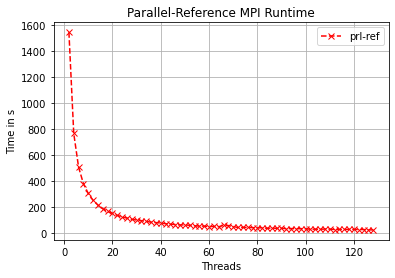

In [5]:
data_dir = '../rawdata/parallel-reference/'
data_sets = [folder.path for folder in os.scandir(data_dir) if folder.is_dir()]

for index, data_set in enumerate(data_sets):
    time_prl = []
    sub_data_sets = [folder.path for folder in os.scandir(data_set) if folder.is_dir()]
    
    for sub_data_set in sub_data_sets:
        
        # =====================================================
        #
        #                  Messdaten Parallel Referenz
        #
        # =====================================================
        files = [filename for filename in os.listdir(sub_data_set) if filename.startswith('prl-ref_')]
        
        if not files:
            break
            
        file_accumulate_prl_ref = sub_data_set + '/accumulated_prl_ref.csv'
    
        with contextlib.suppress(FileNotFoundError):
            os.remove(file_accumulate_prl_ref)
          
        header = ['method', 'threads', 'frames', 'size', 'time']
        
        with open(file_accumulate_prl_ref, 'w', encoding='UTF8', newline='\n') as f:
            writer = csv.writer(f)
            # write the header
            # writer.writerow(header)
                
            for filename in files:
                data = []         
                file_dir = sub_data_set + "\\" + filename
            
                # reading the data from the file
                with open(file_dir) as f:
                    current_data = f.read()
            
                # reconstructing the data as a dictionary
                js = json.loads(current_data)
          
                data.append(js.get("method"))
                data.append(int(js.get("threads")))
                data.append(js.get("frames")) 
                data.append(js.get("size"))
                data.append(float(js.get("time")))
            
                # write the data
                writer.writerow(data)
                
        # =====================================================
        #
        #                  Mittelwert bestimmen
        #
        # =====================================================
        files_prl_ref = [filename for filename in os.listdir(sub_data_set) if filename.startswith('accumulated_prl_ref.csv')]
        
        if not files_prl_ref:
            break
            
        file_accumulate_prl_mean = sub_data_set + '/accumulated_prl_ref.csv'
        df_prl = pd.read_csv(file_accumulate_prl_mean, names=('method', 'threads', 'frames', 'size', 'time'))      
        df_time_prl = pd.DataFrame(df_prl, columns=['time'])       
        time_prl.append(np.array(df_time_prl.values.tolist()))
              
    if time_prl and len(time_prl) > 1:
        t_mean = np.mean(time_prl, axis=0)
        t_std = np.std(time_prl, axis=0, ddof=1)

        filename_prl = data_set + '/prl_ref_data.csv'
        with open(filename_prl, 'w', encoding='UTF8', newline='') as f:
            writer = csv.writer(f)
    
            for idx in range(len(df_prl)):
                data = []
                data.append(df_prl['method'].values[idx])
                data.append(df_prl['threads'].values[idx])
                data.append(df_prl['frames'].values[idx])
                data.append(df_prl['size'].values[idx])
                data.append(t_mean[idx][0])
                data.append(t_std[idx][0])
                # write the data
                writer.writerow(data)
           
        # =====================================================
        #
        #            Plots (Parallel Referenz) 
        #
        # =====================================================
        df_prl_ref = pd.read_csv(file_accumulate_prl_ref, names=('method', 'threads', 'frames', 'ssize', 't_mean')) 
        df_prl_ref = df_prl_ref.sort_values(by='threads')
        # display(df_prl_ref)
        
        method_prl_ref = df_prl_ref['method'][0]
        df_prl_ref.plot(x='threads', y='t_mean', style="rx--", label=method_prl_ref) # kind='scatter'
        
        plt.legend(loc="best")
        plt.title("Parallel-Reference MPI Runtime")
        plt.xlabel("Threads")
        plt.ylabel("Time in s")
        plt.grid()
        plt.savefig('prl-ref-runtime.png', bbox_inches='tight')
        plt.show()
     